In [1]:
#Importing this to navigate directories
import os
#This lets us use regular expression syntax
import re
#This lets us randomly sample from things
import random

#Specifies the folder where my book text files are
filedirectory = '/Users/qad/Documents/dsc_byt'
#Changes to that folder
os.chdir(filedirectory)

In [2]:
#For each file in our directory of text files
for file in os.listdir(filedirectory):
    #If the file ends with .txt
    if file.endswith('.txt'):
        #Open the source file
        with open(file, 'r') as sourcebook:
            #Read the source file
            text = sourcebook.read()
            #Find all things between quotes
            quotes = re.findall(r'“(.*?)”', text)

In [3]:
#Randomly samples our list of quotes for 300 quotes
randomquotes = random.sample(quotes, 300)

#Opens our output file
with open('/Users/qad/Documents/nonilana.csv', 'w') as out:
    #For each quote in our random sample
    for randomquote in randomquotes:
        #Write it to the output file
        out.write(randomquote + '\n')

In [4]:
#File directory for BSC books
filedirectory = '/Users/qad/Documents/dsc_corpus_clean'
os.chdir(filedirectory)

#Create a list for Dawn quotes
dawnlines = []
#For each file in the file directory
for file in os.listdir(filedirectory):
    #If it ends with .txt
    if file.endswith('.txt'):
        #Open the text file
        with open(file, 'r') as book:
            #Read in each line into a list
            lines = book.readlines()
            #For each line
            for line in lines:
                #If it includes 'said Dawn'
                if 'said Dawn' in line:
                    #Add it to the list
                    dawnlines.append(line)
                #If it includes 'Dawn said'
                if 'Dawn said' in line:
                    #Add it to the list
                    dawnlines.append(line)
#Print how many Dawn lines we have
len(dawnlines)

1019

In [5]:
#Make a new list for just the Dawn quotes
dawnwords = []
#For each line we pulled out
for dawnline in dawnlines:
    #Get the part between quotation marks
    dawnquotes = re.findall(r'“(.*?)”', dawnline)
    #Fore each quote
    for dawnquote in dawnquotes:
        #Add it to the list
        dawnwords.append(dawnquote)

In [6]:
#Randomly samples our list of Dawn quotes for 300 quotes
randomdawns = random.sample(dawnwords, 300)
#Opens our output file
with open('/Users/qad/Documents/dawn.csv', 'w') as dawnout:
    #For each quote in our random sample
    for randomdawn in randomdawns:
        #Write it to the output file
        dawnout.write(randomdawn + '\n')

In [7]:
#This installs rpy2, which is my Python-to-R adapter
import sys
!{sys.executable} -m pip install rpy2
#This loads the Jupyter Notebook extension that lets me
#run R code in a notebook that's otherwise Python by default
%load_ext rpy2.ipython

In [8]:
%%R
#Sets the working directory (e.g. where it looks for files)
setwd("/Users/qad/Documents/GitHub/dsc15")
#Reads the non-Ilana quotes CSV
length.nonilana<-read.csv(file='non_ilana_sample.csv', header=T)
#Reads the Ilana quotes CSV
length.ilana<-read.csv(file='ilana.csv', header=T)
#Sets the column names on the Ilana quotes to be attribution, source, quote
colnames(length.ilana)<-c("Attribution", "Source", "Quote")
#Checks the dimensions (rows, columns) for the non-Ilana quotes
dim(length.nonilana)

[1]

 230

   2

In [9]:
%%R
#Book source for the quotes is in the second column in this data
#This code only keeps quotes where the source is one of the books 
length.ilana.table<-length.ilana[which(length.ilana[,2] %in% c("BYT9", "BYT10", "BYT11", "BYT12")),]
#Keep only the first column (attribution, i.e. "Ilana") and third (the text)
length.ilana.table<-length.ilana.table[,c(1,3)]
#Create a table with the non-Ilana quotes
length.nonilana.table<-length.nonilana
#Rename the columns of the Ilana table to match the non-Ilana table
colnames(length.ilana.table)<-colnames(length.nonilana.table)
#Check the dimensions of the Ilana table
dim(length.ilana.table)

[1]

 230

   2

In [10]:
%%R
length.final.table<-rbind(length.ilana.table, length.nonilana.table)
dim(length.final.table)

[1]

 460

   2

In [11]:
%%R
#Mark's cleaning function
fullClean<-function(raw.text){
  raw.text<-unlist(strsplit(raw.text, ""))
  raw.text<-tolower(raw.text)
  clean.text<-raw.text[which(raw.text %in% c(letters, LETTERS, " "))]
  clean.text<-paste(clean.text, collapse="")
  return(clean.text)
}

#Clean the Ilana quotes
clean.length.ilana<-lapply(length.ilana.table$Text, function(x) fullClean(x))
#Clean the non-Ilana quotes
clean.length.nonilana<-lapply(length.nonilana.table$Text, function(x) fullClean(x))

#Adds a CleanText column to the Ilana table
length.ilana.table$CleanText<-clean.length.ilana
#Adds a CleanText column to the non-Ilana table
length.nonilana.table$CleanText<-clean.length.nonilana
#Counts the length and adds a Length column to the Ilana table
text.length<-unlist(lapply(clean.length.ilana, function(x) length(unlist(strsplit(x, " ")))))
length.ilana.table$Length<-text.length
#Counts the length and adds a Length column to the non-Ilana table
text.length<-unlist(lapply(clean.length.nonilana, function(x) length(unlist(strsplit(x, " ")))))
length.nonilana.table$Length<-text.length

In [12]:
%%R
#Average (mean) length of Ilana quotes
mean(length.ilana.table$Length)

[1]

 9.095652

In [13]:
%%R
#Average (mean) length of non-Ilana quotes
mean(length.nonilana.table$Length)

[1]

 11.13913

In [14]:
%%R
#Combine Ilana and non-Ilana tables in a single table
length.table<-rbind(length.ilana.table, length.nonilana.table)
dim(length.table)

[1]

 460

   4

In [15]:
%%R
mean(length.table$Length)

[1]

 10.11739

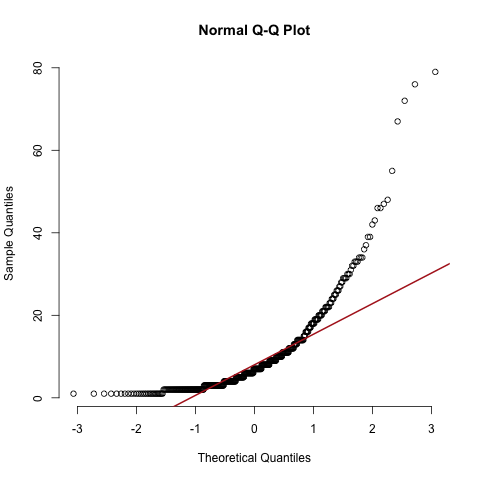

In [16]:
%%R
#Creates the qqnorm plot
qqnorm(length.table$Length, pch=1, frame=F)
#Adds the reference line
qqline(length.table$Length, col="firebrick", lwd=2)

In [17]:
%%R
w.result<-wilcox.test(Length~Attribution, length.table)
w.result

	Wilcoxon rank sum test with continuity correction

data:  

Length by Attribution

W = 24564, p-value = 0.1849

alternative hypothesis: 

true 

location shift

 is 

not equal to

0

In [18]:
%%R

setwd("/Users/qad/Documents/GitHub/dsc15")
if(!require(tm)){
install.packages("tm")
}
if(!require(MASS)){
install.packages("MASS")
}
if(!require(klaR)){
install.packages("klaR")
}
if(!require(e1071)){
install.packages("e1071")
}
if(!require(SnowballC)){
install.packages("SnowballC")
}
if(!require(neuralnet)){
install.packages("neuralnet")
}


R[write to console]: Loading required package: tm



R[write to console]: Loading required package: NLP



R[write to console]: Loading required package: MASS



R[write to console]: Loading required package: klaR



--- Please select a CRAN mirror for use in this session ---

R[write to console]: also installing the dependencies ‘proxy’, ‘e1071’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/proxy_0.4-27.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 190492 bytes (186 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 186 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/e1071_1.7-13.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 660266 bytes (644 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 644 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/classInt_0.4-10.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 498504 bytes (486 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 486 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/labelled_2.12.0.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 307814 bytes (300 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 300 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/combinat_0.0-8.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 40732 bytes (39 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 39 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/questionr_0.7.8.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 3888081 bytes (3.7 MB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 3.7 MB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/klaR_1.7-2.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 566651 bytes (553 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 553 KB




The downloaded binary packages are in
	/var/folders/3r/55b5kjpd4s14_tg80r24vs7r0000gq/T//RtmppUu9zV/downloaded_packages

R[write to console]: Loading required package: e1071



R[write to console]: Loading required package: SnowballC



R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/SnowballC_0.7.1.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 654025 bytes (638 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 638 KB




The downloaded binary packages are in
	/var/folders/3r/55b5kjpd4s14_tg80r24vs7r0000gq/T//RtmppUu9zV/downloaded_packages

R[write to console]: Loading required package: neuralnet



R[write to console]: also installing the dependency ‘Deriv’




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/Deriv_4.1.3.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 147018 bytes (143 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 143 KB




R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/bin/macosx/contrib/4.2/neuralnet_1.44.2.tgz'



R[write to console]: Content type 'application/x-gzip'


R[write to console]:  length 121688 bytes (118 KB)



R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: =


R[write to console]: 



R[write to console]: downloaded 118 KB




The downloaded binary packages are in
	/var/folders/3r/55b5kjpd4s14_tg80r24vs7r0000gq/T//RtmppUu9zV/downloaded_packages

In [19]:
%%R
#Import non-Ilana sample
non.ilana.mdws<-read.csv(file='non_ilana_sample.csv', header=T)
#Import Ilana quotes
ilana.mdws<-read.csv(file='ilana.csv', header=T)
#Label the columns for the Ilana quotes
colnames(ilana.mdws)<-c("Attribution", "Group", "Text")
#Get the dimensions of the non-Ilana data
dim(non.ilana.mdws)

[1]

 230

   2

In [20]:
%%R
#Get the dimensions of the Ilana data
dim(ilana.mdws)

[1]

 673

   3

In [21]:
%%R
#Get Ilana quotes, grouped by book
table(ilana.mdws$Group)

BYT10 

BYT11 

BYT12 

BYT13 

BYT14 

BYT15 

BYT16 

BYT17 

 BYT9 

   36 

  100 

   38 

  126 

  108 

   64 

   88 

   57 

   56 

In [22]:
%%R 
#Use only the Ilana quotes from books 9-12
ilana.quotes.mdws<-ilana.mdws$Text[which(ilana.mdws$Group %in% c('BYT9', 'BYT10', "BYT11", "BYT12"))]
#Get the length of the Ilana quotes from the distinctive books
length(ilana.quotes.mdws)

[1]

 230

In [23]:
%%R
#Create a vector of just the text of non-Ilana quotes
non.ilana.quotes.mdws<-non.ilana.mdws$Text
#Combine Ilana and non-Ilana quotes
quotes.mdws<-c(ilana.quotes.mdws, non.ilana.quotes.mdws)
length(quotes.mdws)

[1]

 460

In [24]:
%%R
#Create a vector for groups, to label Ilana & non-Ilana data
groups.mdws<-c(rep("Ilana", 230), rep("nonIlana", 230))
length(groups.mdws)

[1]

 460

In [25]:
%%R
#make a new table out of the sampled corpus and group designations
new.ilana.table.mdws<-data.frame(groups.mdws, quotes.mdws)
metadata.table.mdws<-new.ilana.table.mdws

In [26]:
%%R
#Extract the text from the table
raw.corpus.mdws<-quotes.mdws
#Apply the cleaning function
clean.corpus.mdws<-lapply(raw.corpus.mdws, function(x) fullClean(x))
#Create a vector with the clean corpus
clean.corpus.mdws<-Corpus(VectorSource(clean.corpus.mdws))
#Remove stopwords
clean.corpus.mdws<-tm_map(clean.corpus.mdws, content_transformer(removeWords), stopwords("en"))
#Create a vector with the default English stopwords list
all.sw<-stopwords('en')


In [27]:
%%R
which(all.sw=="like")

integer(0)


In [28]:
%%R
which(all.sw=="really")

integer(0)


In [29]:
%%R
which(all.sw=="has")

[1]

 47

In [30]:
%%R
corpus.dtm.mdws<-DocumentTermMatrix(clean.corpus.mdws, control=list(wordLengths=c(1,Inf)))
corpus.dtm.mdws

<<DocumentTermMatrix (documents: 460, terms: 988)>>


Non-/sparse entries: 2408/452072


Sparsity           : 99%


Maximal term length: 19


Weighting          : term frequency (tf)


In [31]:
%%R
#Get the document-term matrix as a matrix
corpus.matrix.mdws<-as.matrix(corpus.dtm.mdws)
#Add up the word counts for each row (quote)
all.sums.mdws<-rowSums(corpus.matrix.mdws)
#Which ones have a total word count of zero (i.e. no words)
length(all.sums.mdws==0)

[1]

 460

In [32]:
%%R
raw.corpus.mdws[which(all.sums.mdws==0)]

 [1]

 "I was here before"

 "This is it"       

 "There she is"     

 [4]

 "So do I."         

 "What is it?"      

 "If you have to,"  

 [7]

 "Why is that?"     

 "No..."            

 "Not me,"          

[10]

 "What?"            

 "No,"              

 "You what?!"       

In [33]:
%%R
corpus.matrix.mdws<-as.matrix(corpus.dtm.mdws)
corpus.matrix.mdws<-corpus.matrix.mdws[-which(all.sums.mdws==0),]
dim(corpus.matrix.mdws)

[1]

 448

 988

In [34]:
%%R
metadata.table.mdws<-metadata.table.mdws[-which(all.sums.mdws==0),]
dim(metadata.table.mdws)

[1]

 448

   2

In [35]:
%%R
n=500
word.sums.mdws<-colSums(corpus.matrix.mdws)
word.sums.mdws<-sort(word.sums.mdws, decreasing=T)
mfw.mdws<-names(word.sums.mdws[1:n])
mfw.mdws[1:15]

 [1]

 "like"   

 "just"   

 "im"     

 "right"  

 "thats"  

 "can"    

 "sure"   

 [8]

 "well"   

 "get"    

 "good"   

 "think"  

 "really" 

 "dont"   

 "amazing"

[15]

 "now"    

In [36]:
%%R
#This code is called by the function below - don't run this by itself
#Code takes two variables. 
#1. A document term matrix (rows as documents, columns as words, cells as counts of words in documents)
#2. A vector of group assignments for the texts
qdMDWs<-function(dtm.matrix, groups, alpha=0.05){
  #let user know what's happening
  print("MDWs")
  #get all of the actual words from the columns in the document term matrix
  all.terms<-colnames(dtm.matrix)
  #figure out which columns in the DTM correspond to the target population
  target.index<-which(groups=="Target")
  #Assuming that there are more than one text in the target group
  if(length(target.index)>1){
    #get the total count of each word for all of the texts in the target group
    target.sub<-colSums(dtm.matrix[target.index,])
    #if not
  } else {
    #just get the counts for that text
    target.sub<-dtm.matrix[target.index,]
  }
  #get the total count for all groups of each words
  total.obs<-colSums(dtm.matrix)
  #get the total word count for all of the words in the target subset of the corpus
  target.words<-sum(target.sub)
  #calculate frequencies of words in target group by dividing by total words in corpus
  target.scaled<-target.sub/sum(target.sub)
  #calculate frequencies of all words in the corpus (target and non-target)
  total.scaled<-total.obs/sum(total.obs)
  #find expected number of each words in the target sub-corpus by multiplying the total frequency across the entire corpus by the number of words in the target corpus
  target.exp<-round((total.scaled*target.words), 0)
  #find the difference between the expected number of words and the actual number of words in the target subcorpus
  term.diff<-target.sub-target.exp
  #find all of the words that show up less frequently than expected
  keep.index<-which(term.diff>0)
  #remove the words that show up less frequently than expected from the total corpus
  all.terms<-all.terms[keep.index]
  #remove the words that show up less frequently than expected from the target subcorpus
  target.sub<-target.sub[keep.index]
  #remove the words that show up less frequently than expected from the target expected subcorpus
  target.exp<-target.exp[keep.index]
  #find the total number of times for each word that it isn't in the target corpus
  target.missing<-target.words-target.sub
  #find the total number of times for each expected word that would would expect to not find it in the target corpus
  target.missing.exp<-target.words-target.exp
  #for every word, create a 2x2 contingency table of the number of times the word appears, the number of times it doesn't appear, the number of times we expect it to appear, the number of times we expect it not to appear
  all.c.tables<-mapply(function(x,y,z,a) matrix(c(x,y,z,a), ncol=2, byrow=T), target.sub, target.exp, target.missing, target.missing.exp, SIMPLIFY=F)
  #run a fisher's exact test on all of the contingency tables (1 ber word)
  all.fishers<-lapply(all.c.tables, function(x) fisher.test(x))
  #extract the p value from all of the fisher's tests
  all.p<-unlist(lapply(all.fishers, function(x) x$p.value))
  #figure out which ones are significantly more present
  sig.index<-which(all.p<alpha)
  #tell the user you are about to print out the number of significant mdws
  print("Significant MDWs:")
  #print the number of significant mdws
  print(length(sig.index))
  #if there are more than 0 mdws
  if(length(sig.index)>0){
    #create a vector of the words (the mdws)
    Term<-all.terms[sig.index]
    #create a vector of the number of times each word appears in the target corpus
    Obs<-target.sub[sig.index]
    #create a vector of the frequency of the words in the target corpus
    ObsScaled<-Obs/target.words
    #create a vector of the observed over expected for each word
    Obs_Exp<-Obs/target.exp[sig.index]
    #create a vector of the p.values for each word
    pValue<-all.p[sig.index]
    #merge all of these vectors into a dataframe
    final.table<-data.frame(Term, Obs, ObsScaled, Obs_Exp, pValue)
    #sort the data frame by the ObsScaled
    final.table<-final.table[order(final.table[,3], decreasing=T),]
    #create a column ranking the words by their scaled frequency
    final.table$Rank<-seq(1, nrow(final.table), by=1)
    #return the table
    return(final.table)
  } else {
    #if there are no mdws, return an NA
    return(NA)
  }
}

#this is the code to run, it takes two variables
#1) a document term matrix (words as columns, texts as rows, cells as individual counts (NOT FREQUENCIES))
#2) a vector of group assignments for the texts - the code will find MDWs for each group
allMDW<-function(dtm.matrix, group.vector, alpha=0.05){
  #find the names of the unique groups
  unique.groups<-unique(group.vector)
  #find the number of unique groups
  num.groups<-length(unique.groups)
  #create an empty list to put the mdw tables in
  all.mdws<-list()
  #for each group
  for(i in 1:num.groups){
    #get the name of the current group
    curr.group<-unique.groups[i]
    #print out the name of the current group
    print(curr.group)
    #move group vector into a temporary variable
    temp.groups<-group.vector
    #rename all of the elements of that vector that correspond to the current target group as "Target"
    temp.groups[which(temp.groups==curr.group)]<-"Target"
    #run the code above, but sending the original dtm, by our modified group vector in which the ones we care about are now named "Target"
    mdws<-qdMDWs(dtm.matrix, temp.groups, alpha)
    #if there are any MDWs
    if(!is.na(mdws)){
      #On the resulting table from the code above, create a new column labeled by the name of the group
      mdws$Group<-rep(curr.group, nrow(mdws))
      #add that mdw table (the current one) to the list of all mdw tables
      all.mdws<-c(all.mdws, list(mdws))
    }
  }
  #collapse the list of all mdw tables into one big table
  all.mdws<-do.call("rbind", all.mdws)
  #return it
  return(all.mdws)
}


In [37]:
%%R
#Get the group data from the metadata
group.source.mdws<-metadata.table.mdws$Group
#Run the allMDW function using the corpus, the groups, and a cut-off of 0.5
mdw.table<-allMDW(corpus.matrix.mdws, group.source.mdws, 0.05)
#Create a CSV for the MDWs
write.csv(mdw.table, file="CorpusMDWs.csv", row.names=F)
mdw<-unique(mdw.table[,1])

NULL


[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

NULL


[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

In [38]:
%%R
group.source.mdws<-metadata.table.mdws$Group
#Now we're using .1 as the cutoff
mdw.table<-allMDW(corpus.matrix.mdws, group.source.mdws, 0.1)
write.csv(mdw.table, file="CorpusMDWs-v2.csv", row.names=F)
mdw<-unique(mdw.table[,1])

NULL


[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

NULL


[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

In [39]:
%%R
#Sets the working directory (e.g. where it looks for files)
setwd("/Users/qad/Documents/GitHub/dsc15")
#Reads the non-Ilana quotes CSV
nonilana.pca<-read.csv(file='non_ilana_sample.csv', header=T)
#Reads the Ilana quotes CSV
ilana.pca<-read.csv(file='ilana.csv', header=T)
#Sets the column names on the Ilana quotes to be attribution, source, quote
colnames(length.ilana)<-c("Attribution", "Source", "Quote")
#Checks the dimensions (rows, columns) for the non-Ilana quotes
dim(length.nonilana)

[1]

 230

   2

In [40]:
%%R
ilana.quotes.pca<-ilana.mdws$Text[which(ilana.mdws$Group %in% c('BYT9', 'BYT10', "BYT11", "BYT12"))]


R[write to console]: Loading required package: ggplot2



R[write to console]: 
Attaching package: ‘ggplot2’




R[write to console]: The following object is masked from ‘package:NLP’:

    annotate




R[write to console]: Loading required package: plyr



R[write to console]: Loading required package: scales



R[write to console]: Loading required package: grid



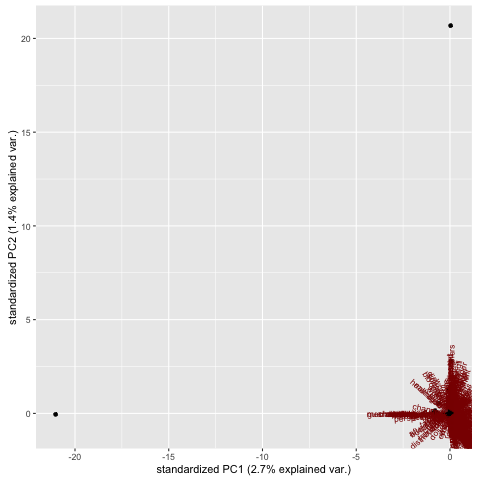

In [41]:
%%R
#Turn word counts into word frequencies
scaled.dtm.pca<-corpus.matrix.mdws/rowSums(corpus.matrix.mdws)
#Get the most frequent words using the scaled corpus
features.to.keep.mdws<-mfw.mdws
#Create the feature table
feature.table.pca<-scaled.dtm.pca[,which(colnames(scaled.dtm.pca) %in% features.to.keep.mdws)]
feature.names.pca<-colnames(feature.table.pca)

#Do PCA to see if there is visual separation between the groups based on all 500 most frequent words
colnames(feature.table.pca)<-feature.names.pca
test.pca<-prcomp(feature.table.pca)
#Load the biplot library
library(ggbiplot)
#Generate the biplot
test.pca<-prcomp(feature.table.pca, scale=T)
ggbiplot(test.pca, ellipse=T, groups=metadata.table.mdws$Group)


In [42]:
%%R
#Try again with 50 words
top.mfw.pca<-mfw.mdws[1:50]
top.mfw.pca

 [1]

 "like"     

 "just"     

 "im"       

 "right"    

 "thats"    

 "can"      

 [7]

 "sure"     

 "well"     

 "get"      

 "good"     

 "think"    

 "really"   

[13]

 "dont"     

 "amazing"  

 "now"      

 "totally"  

 "nechama"  

 "one"      

[19]

 "chani"    

 "going"    

 "mrs"      

 "way"      

 "batya"    

 "us"       

[25]

 "will"     

 "pinky"    

 "know"     

 "okay"     

 "theres"   

 "come"     

[31]

 "make"     

 "new"      

 "time"     

 "much"     

 "lets"     

 "see"      

[37]

 "hey"      

 "shes"     

 "look"     

 "got"      

 "youre"    

 "want"     

[43]

 "work"     

 "go"       

 "something"

 "mean"     

 "great"    

 "take"     

[49]

 "youll"    

 "shani"    

In [43]:
%%R
#Only keep the top 50 features
top.features.pca<-feature.table.pca[,which(colnames(feature.table.pca) %in% top.mfw.pca)]
#Get the actual words
feature.names.pca<-colnames(feature.table.pca)
dim(top.features.pca)

[1]

 448

  50

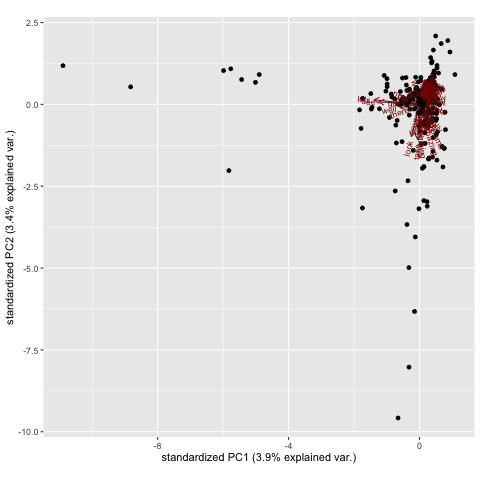

In [44]:
%%R
colnames(feature.table.pca)<-feature.names.pca
test2.pca<-prcomp(top.features.pca)
library(ggbiplot)
test2.pca<-prcomp(top.features.pca, scale=T)
ggbiplot(test2.pca, ellipse=T, groups=metadata.table.mdws$Group)

In [45]:
%%R
setwd("/Users/qad/Documents/GitHub/dsc15")
ilana.sc<-read.csv("ilana.csv", header=T)
non.ilana.sc<-read.csv("non_ilana_sample.csv", header=T)
ilana.quotes.sc<-ilana.sc$Quote[which(ilana.sc$Source %in% c("BYT9", "BYT10", "BYT11", "BYT12"))]
all.text.sc<-c(ilana.quotes.sc, non.ilana.sc$Text)
groups.sc<-c((rep("Ilana", 230)), rep("NonIlana", 230))

In [46]:
%%R
metadata.table.sc<-data.frame(all.text.sc, groups.sc)
colnames(metadata.table.sc)<-c("Text", "Group")
raw.corpus.sc<-all.text.sc
clean.corpus.sc<-lapply(raw.corpus.sc, function(x) fullClean(x))
#Create a vector with the clean corpus
clean.corpus.sc<-Corpus(VectorSource(clean.corpus.sc))
corpus.dtm.sc<-DocumentTermMatrix(clean.corpus.sc, control=list(wordLengths=c(1,Inf)))
corpus.matrix.sc<-as.matrix(corpus.dtm.sc)
corpus.dtm.sc

<<DocumentTermMatrix (documents: 460, terms: 1095)>>


Non-/sparse entries: 4253/499447


Sparsity           : 99%


Maximal term length: 19


Weighting          : term frequency (tf)


In [47]:
%%R
n=75
word.sums.sc<-colSums(corpus.matrix.sc)
word.sums.sc<-sort(word.sums.sc, decreasing=T)
mfw.sc<-names(word.sums.sc[1:n])
scaled.dtm.sc<-corpus.matrix.sc/rowSums(corpus.matrix.sc)
features.to.keep.sc<-mfw.sc
feature.table.sc<-scaled.dtm.sc[,which(colnames(scaled.dtm.sc) %in% features.to.keep.sc)]
feature.names.sc<-colnames(feature.table.sc)
colnames(feature.table.sc)<-feature.names.sc
dim(feature.table.sc)

[1]

 460

  75

In [48]:
%%R
library(klaR)
feature.names.sc<-gsub("’", "'", feature.names.sc)
colnames(feature.table.sc)<-feature.names.sc
vars<-stepclass(feature.table.sc, metadata.table.sc$Group, method="lda", improvement=0.0001)

R[write to console]:  `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.



R[write to console]: 460 observations of 75 variables in 2 classes; direction: both



R[write to console]: stop criterion: improvement less than 0.01%.



correctness rate: 0.5413;  in: "like";  

variables (1):

like

correctness rate: 0.57826;  in: "amazing";  

variables (2):

like,

amazing

correctness rate: 0.60652;  in: "right";  

variables (3):

like,

amazing,

right

correctness rate: 0.62174;  in: "out";  

variables (4):

like,

amazing,

right,

out

correctness rate: 0.63478;  in: "can";  

variables (5):

like,

amazing,

right,

out,

can

correctness rate: 0.64565;  in: "the";  

variables (6):

like,

amazing,

right,

out,

can,

the

correctness rate: 0.66087;  in: "sure";  

variables (7):

like,

amazing,

right,

out,

can,

the,

sure

correctness rate: 0.66739;  in: "chani";  

variables (8):

like,

amazing,

right,

out,

can,

the,

sure,

chani

correctness rate: 0.68043;  in: "okay";  

variables (9):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay

correctness rate: 0.68261;  in: "mrs";  

variables (10):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs

correctness rate: 0.68913;  in: "totally";  

variables (11):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs,

totally

correctness rate: 0.6913;  in: "theres";  

variables (12):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs,

totally,

theres

correctness rate: 0.69783;  in: "now";  

variables (13):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs,

totally,

theres,

now

correctness rate: 0.70217;  in: "us";  

variables (14):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs,

totally,

theres,

now,

us

correctness rate: 0.70435;  in: "make";  

variables (15):

like,

amazing,

right,

out,

can,

the,

sure,

chani,

okay,

mrs,

totally,

theres,

now,

us,

make

 hr.elapsed 

min.elapsed 

sec.elapsed 

      0.000 

      1.000 

     21.676 

In [49]:
%%R
setwd("/Users/qad/Documents/GitHub/dsc15")
ilana.tg<-read.csv("ilana.csv", header=T)
non.ilana.tg<-read.csv("non_ilana_sample.csv", header=T)
non.ilana.tg<-non.ilana.tg[,2]
ilana.quotes.tg<-ilana.tg$Quote[which(ilana.tg$Source %in% c("BYT9", "BYT10", "BYT11", "BYT12"))]
all.text.tg<-c(ilana.quotes.tg, non.ilana.tg)
all.groups.tg<-c(rep("Ilana", length(ilana.quotes.tg)), rep("NonIlana", length(non.ilana.tg)))
length(all.groups.tg)

[1]

 460

In [50]:
%%R
#Function for creating trigrams
#Subs spaces with an underscore, finds start and end points, and applies it to text
makeCharacterTrigrams<-function(dialogue, str.length=3){
  dialogue<-gsub(" ", "_", dialogue)
  dialogue.sep<-unlist(strsplit(dialogue, ""))
  starting.points<-seq(1,(length(dialogue.sep)-(str.length-1)), by=1)
  ending.points<-starting.points+(str.length-1)
  all.str<-mapply(function(x,y) dialogue.sep[x:y], starting.points, ending.points, SIMPLIFY = F)
  all.str<-unlist(lapply(all.str, function(x) paste(x, collapse="")))
  return(all.str)
}

In [51]:
%%R
#Lower-cases all text
all.text.tg<-tolower(all.text.tg)
all.text.length.tg<-unlist(lapply(all.text.tg, function(x) length(unlist(strsplit(x, "")))))
#Identifies quotes with fewer than 3 characters & removes it
badtext.tg<-which(all.text.length.tg < 3)
if (length(badtext.tg) > 0) {
  all.text.tg<-all.text.tg[-badtext.tg]
  all.groups.tg<-all.groups.tg[-badtext.tg]
}                      
#Applies trigram-making code to the text
all.trigrams.tg<-lapply(all.text.tg, function(x) makeCharacterTrigrams(x))
all.trigrams.tg<-unlist(lapply(all.trigrams.tg, function(x) paste(x, collapse=" ")))
#Print quote 60 in its trigram form
all.trigrams.tg[60]

[1]

 "let et’ t’s ’s_ s_s _se see"

In [52]:
%%R
#Create a metadata table with all the texts and all the groups
metadata.table.tg<-data.frame(all.groups.tg, all.text.tg)
#Label the columns
colnames(metadata.table.tg)<-c("Group", "Text")
#Create a corpus with the trigrams
raw.corpus.tg<-all.trigrams.tg
clean.corpus.tg<-Corpus(VectorSource(raw.corpus.tg))
#Create document-term matrix
corpus.dtm.tg<-DocumentTermMatrix(clean.corpus.tg, control=list(wordLengths=c(1,Inf)))
corpus.matrix.tg<-as.matrix(corpus.dtm.tg)
corpus.dtm.tg

<<DocumentTermMatrix (documents: 460, terms: 2933)>>


Non-/sparse entries: 21158/1328022


Sparsity           : 98%


Maximal term length: 3


Weighting          : term frequency (tf)


In [53]:
%%R
n=75
word.sums.tg<-colSums(corpus.matrix.tg)
word.sums.tg<-sort(word.sums.tg, decreasing=T)
mfw.tg<-names(word.sums.tg[1:n])
group.source.tg<-metadata.table.tg$Group
mdw.table.tg<-allMDW(corpus.matrix.tg, group.source.tg, 0.05)
mdw.table.tg

[1]

 "Ilana"

[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

[1]

 "NonIlana"

[1]

 "MDWs"

[1]

 "Significant MDWs:"

[1]

 0

NULL


In [54]:
%%R
scaled.dtm.tg<-corpus.matrix.tg/rowSums(corpus.matrix.tg)
features.to.keep.tg<-mfw.tg
feature.table.tg<-scaled.dtm.tg[,which(colnames(scaled.dtm.tg) %in% features.to.keep.tg)]
feature.names.tg<-colnames(feature.table.tg)
feature.names.tg<-gsub('_', ' ', feature.names.tg)
colnames(feature.table.tg)<-feature.names.tg
dim(feature.table.tg)

[1]

 460

  75

In [55]:
%%R
library(klaR)
feature.names.tg<-gsub("’", "'", feature.names.tg)
colnames(feature.table.tg)<-feature.names.tg
vars<-stepclass(feature.table.tg, metadata.table.tg[,1], method="lda", improvement=0.0001)

R[write to console]:  `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.



R[write to console]: 460 observations of 75 variables in 2 classes; direction: both



R[write to console]: stop criterion: improvement less than 0.01%.



correctness rate: 0.55;  in: " an";  

variables (1):

 an

correctness rate: 0.56087;  in: "hin";  

variables (2):

 an,

hin

correctness rate: 0.57391;  in: "me ";  

variables (3):

 an,

hin,

me 

correctness rate: 0.58478;  in: "it ";  

variables (4):

 an,

hin,

me ,

it 

 hr.elapsed 

min.elapsed 

sec.elapsed 

      0.000 

      0.000 

     20.364 